In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [102]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

In [103]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [104]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [105]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [106]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

## Check for missing values

In [107]:
print("Missing Values:\n")
print("Customers:\n", customers.isnull().sum())
print("\nProducts:\n", products.isnull().sum())
print("\nTransactions:\n", transactions.isnull().sum())

Missing Values:

Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


## Handle duplicates

In [108]:
transactions = transactions.drop_duplicates(subset=['TransactionID'])

## Customers Analysis


Number of Unique Customers: 200
Customers by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


C:\Users\Ankit\AppData\Local\Temp\ipykernel_13004\169028367.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Region', data=customers, palette='viridis')


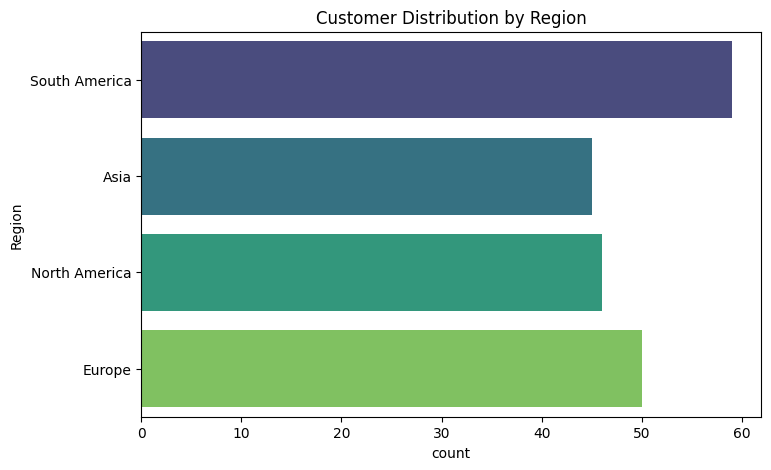

In [109]:
print("\nNumber of Unique Customers:", customers['CustomerID'].nunique())
print("Customers by Region:")
print(customers['Region'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(y='Region', data=customers, palette='viridis')
plt.title("Customer Distribution by Region")
plt.show()

## Products Analysis


Number of Unique Products: 100
Products by Category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


C:\Users\Ankit\AppData\Local\Temp\ipykernel_13004\3411817645.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=products, palette='coolwarm')


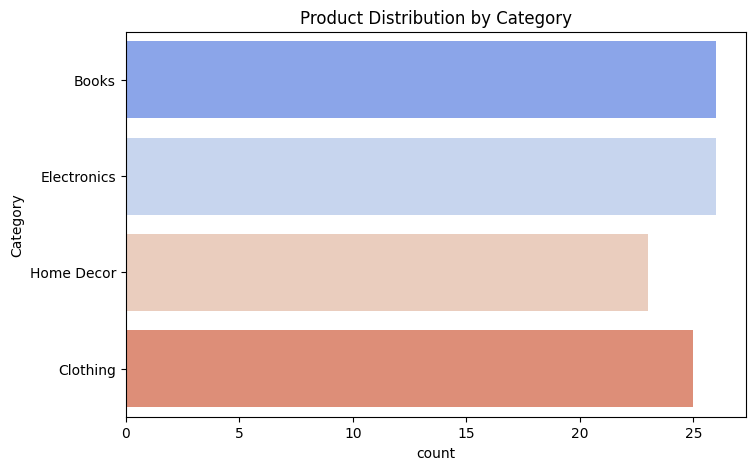

In [110]:
print("\nNumber of Unique Products:", products['ProductID'].nunique())
print("Products by Category:")
print(products['Category'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(y='Category', data=products, palette='coolwarm')
plt.title("Product Distribution by Category")
plt.show()

## Transactions Analysis

Transaction Overview:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


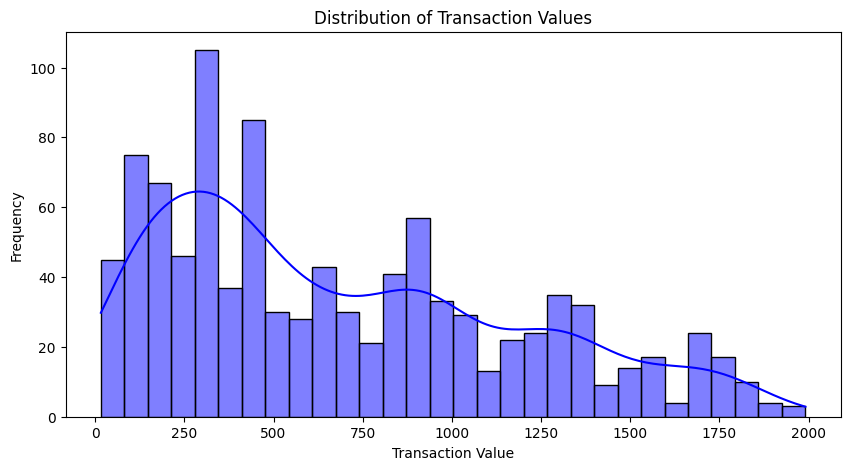

In [112]:
print("Transaction Overview:")
print(transactions.describe())

plt.figure(figsize=(10, 5))
sns.histplot(transactions['TotalValue'], bins=30, kde=True, color='blue')
plt.title("Distribution of Transaction Values")
plt.xlabel("Transaction Value")
plt.ylabel("Frequency")
plt.show()

## Merge datasets for analysis

In [113]:
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_data = pd.merge(merged_data, products, on='ProductID', how='left')

## Region-wise revenue

C:\Users\Ankit\AppData\Local\Temp\ipykernel_13004\3618441498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.values, y=region_revenue.index, palette='viridis')


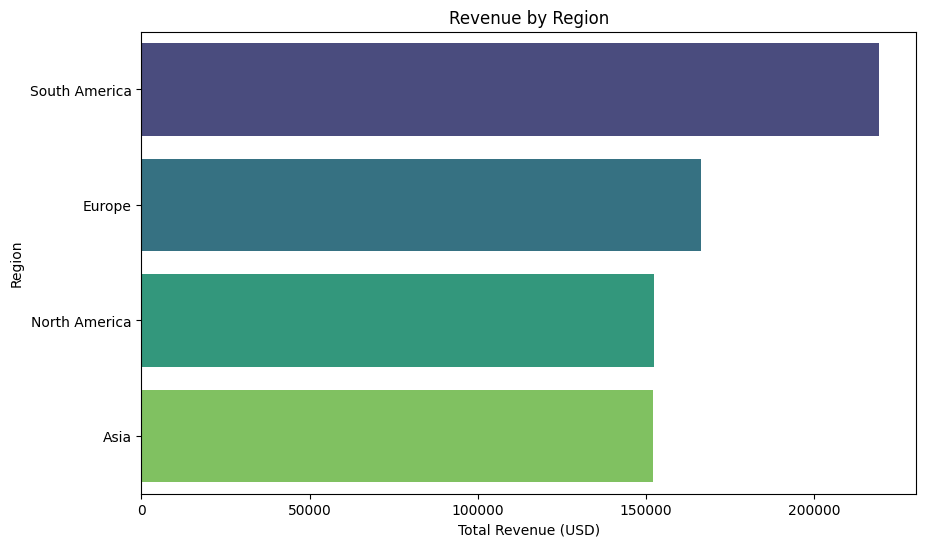

In [114]:
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_revenue.values, y=region_revenue.index, palette='viridis')
plt.title('Revenue by Region')
plt.xlabel('Total Revenue (USD)')
plt.show()

## Monthly sales

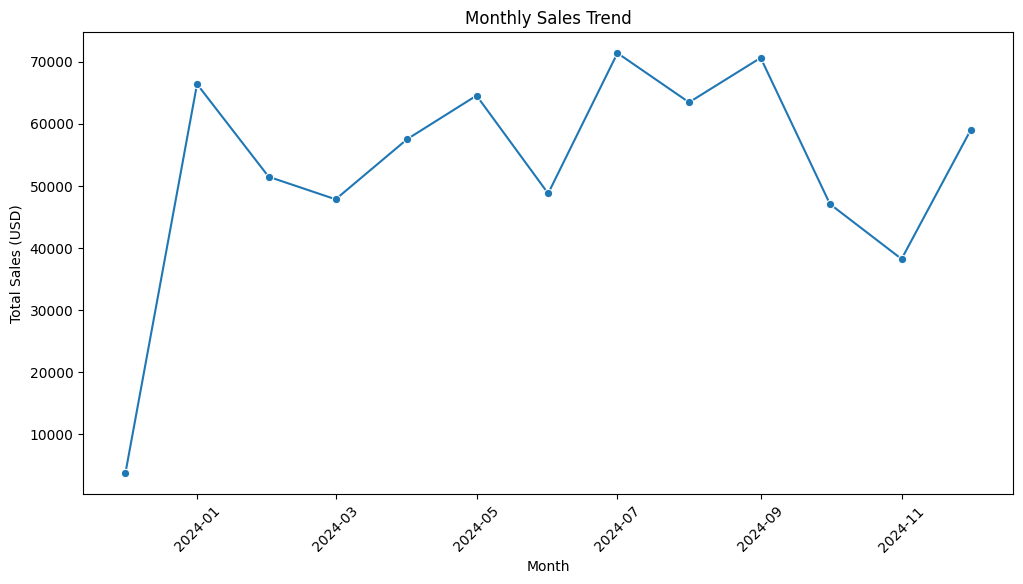

In [115]:
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('TransactionMonth')['TotalValue'].sum().reset_index()
monthly_sales['TransactionMonth'] = monthly_sales['TransactionMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionMonth', y='TotalValue', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

## Top Customer by Revenue

In [87]:
top_customers = merged_data.groupby(['CustomerID', 'CustomerName', 'Region']).agg(
    TotalSpend=('TotalValue', 'sum'),
    TransactionCount=('TransactionID', 'count')
).reset_index()
top_customers=top_customers.sort_values(by='TotalSpend', ascending=False)
top_customers['TotalSpend'] = top_customers['TotalSpend'].map('${:,.2f}'.format)
print("Top 10 Spending Customers:")
display(top_customers.head(10))

Top 10 Spending Customers:


,CustomerID,CustomerName,Region,TotalSpend,TransactionCount
127,C0141,Paul Parsons,Europe,"$10,673.87",10
140,C0156,William Adams,North America,"$7,634.45",11
72,C0082,Aimee Taylor,South America,"$7,572.91",7
170,C0188,Anna Ball,South America,"$7,111.32",8
89,C0099,Rodney Eaton,South America,"$6,715.72",8
149,C0165,Juan Mcdaniel,South America,"$6,708.10",9
94,C0104,Laura Bennett,South America,"$6,579.10",8
159,C0175,Matthew Johnson,Asia,"$6,210.53",10
35,C0041,Lindsey Deleon,Europe,"$6,149.78",7
92,C0102,Michael Atkinson,South America,"$6,132.36",8


## Top 5 Products by Sales

In [100]:
top_products = merged_data.groupby('ProductName').agg(TotalValue=('TotalValue', 'sum')).sort_values(by='TotalValue', ascending=False).reset_index()
print("\nTop 5 Products by Sales:")
display(top_products.head())


Top 5 Products by Sales:


,ProductName,TotalValue
0,ActiveWear Smartwatch,33094.29
1,SoundWave Novel,19950.60
2,SoundWave Headphones,17914.73
3,ActiveWear Rug,17640.95
4,TechPro Textbook,17084.36
